In [1]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image
from sklearn.preprocessing import LabelEncoder

2024-11-02 16:22:20.915363: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# --- Data Pre-processing ---

# Path to dataset
dataset_path = '/Users/aarush/Downloads/Indian/' 

# Initialize lists to store images and labels
images, labels = [], []

# Load images and their labels
for label in os.listdir(dataset_path):
    label_path = os.path.join(dataset_path, label)
    if os.path.isdir(label_path):  # Ensure the path is a directory
        for img_file in os.listdir(label_path):
            img_path = os.path.join(label_path, img_file)
            img = image.load_img(img_path, target_size=(64, 64), color_mode='grayscale')
            img = image.img_to_array(img) / 255.0  # Normalize
            images.append(img)
            labels.append(label)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Encode labels and convert to categorical
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
labels = to_categorical(labels)  # One-hot encode for classification

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Data Augmentation for Training Data
train_datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
train_datagen.fit(X_train)

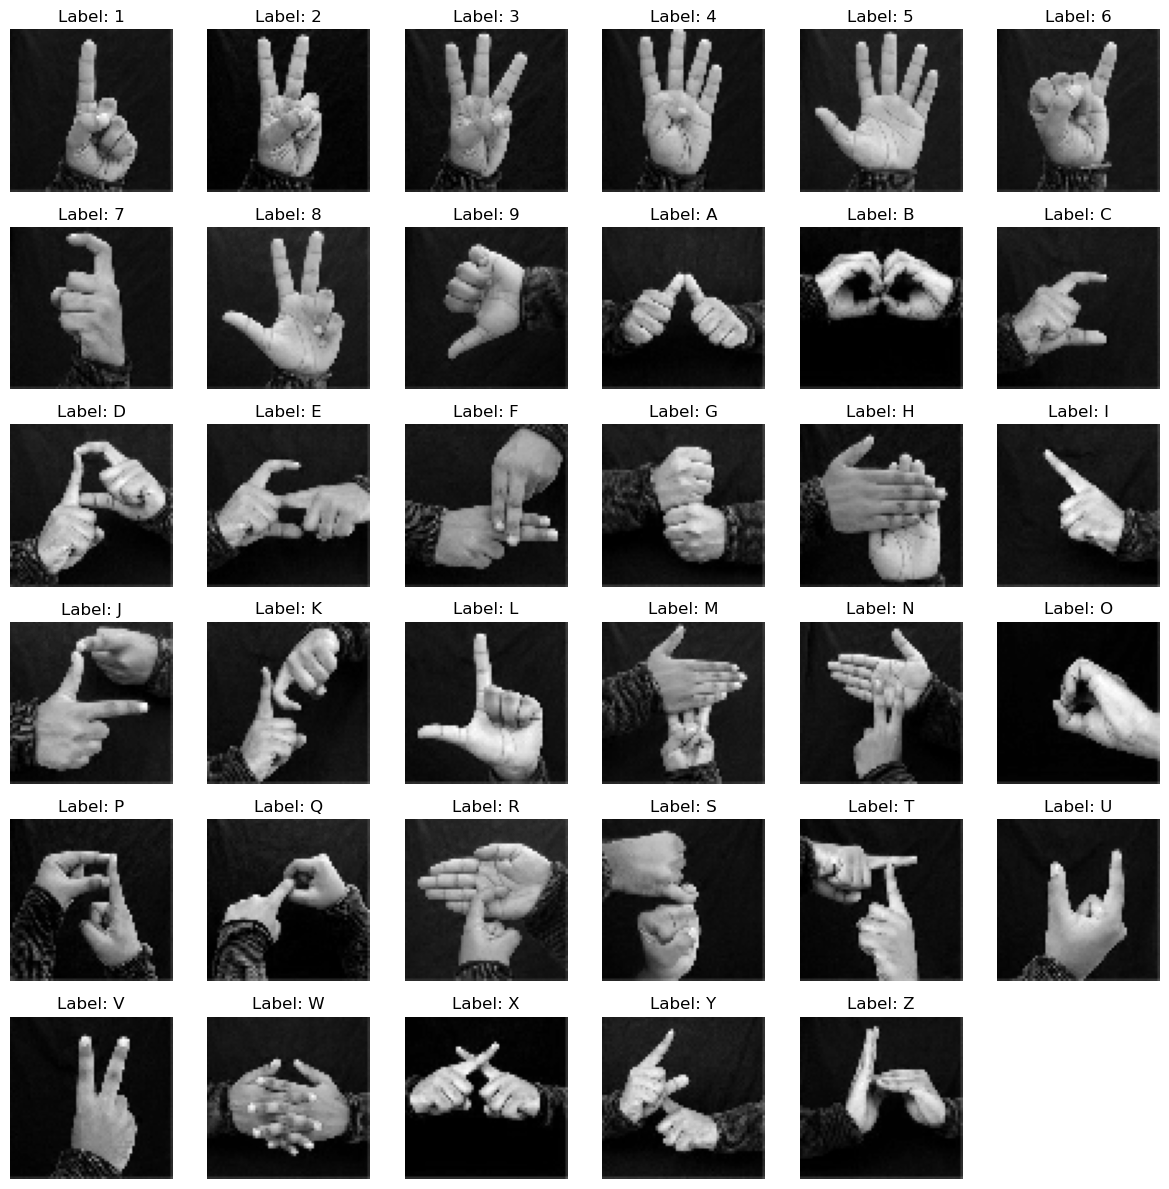

In [12]:
# --- Data Visualization ---
# Find indices for each unique label in the dataset to display one sample per label
unique_labels = np.unique(np.argmax(y_train, axis=1))
sample_images = [X_train[np.argmax(y_train, axis=1) == label][0] for label in unique_labels]
sample_labels = [label_encoder.inverse_transform([label])[0] for label in unique_labels]

# Define the grid dimensions 
plt.figure(figsize=(12, 12))
grid_size = int(np.ceil(np.sqrt(len(unique_labels))))

# Plot each sample image with its label
for i, (img, label) in enumerate(zip(sample_images, sample_labels)):
    plt.subplot(grid_size, grid_size, i + 1)
    plt.imshow(img.reshape(64, 64), cmap='gray')
    plt.title(f"Label: {label}")
    plt.axis('off')

plt.tight_layout()
plt.show()


Epoch 1/15
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 183s 168ms/step - accuracy: 0.6453 - loss: 1.2313 - val_accuracy: 0.9984 - val_loss: 0.0052
Epoch 2/15
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 175s 164ms/step - accuracy: 0.9539 - loss: 0.1376 - val_accuracy: 0.9991 - val_loss: 0.0044
Epoch 3/15
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 180s 168ms/step - accuracy: 0.9707 - loss: 0.0835 - val_accuracy: 0.9994 - val_loss: 0.0020
Epoch 4/15
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 178s 166ms/step - accuracy: 0.9783 - loss: 0.0587 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 5/15
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 181s 169ms/step - accuracy: 0.9840 - loss: 0.0496 - val_accuracy: 1.0000 - val_loss: 2.9922e-04
Epoch 6/15
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 200s 168ms/step - accuracy: 0.9868 - loss: 0.0382 - val_accuracy: 0.9999 - val_loss: 3.6206e-04
Epoch 7/15
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 185s 173ms/step - accuracy: 0.9896 - loss: 0.0312 - val_accuracy: 1.0000 - val_loss: 3.9934e-04
Epoch 8/15
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 186s 174

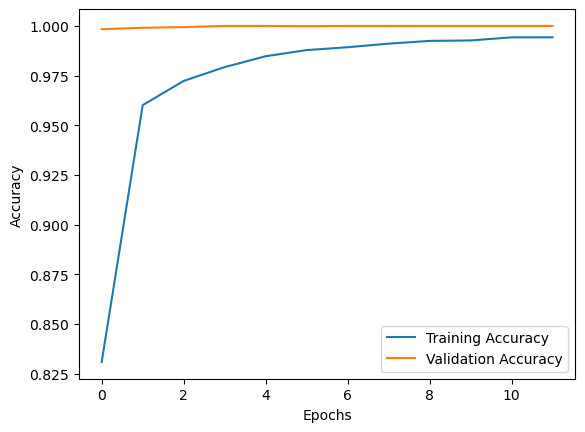

268/268 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 1.0000 - loss: 9.8212e-07
Test Accuracy: 1.00

In [55]:
# --- Model Creation ---
# Define the CNN Model for Hand Sign Recognition
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(35, activation='softmax')  # Changed from 36 to 35 classes
])


# Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Model with Early Stopping Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_test, y_test),
    epochs=15,
    callbacks=[early_stopping]
)

# Plot Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate Model on Test Data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Save the Model
model.save('/Users/aarush/Downloads/hand_sign_recognition_model.h5')

NameError: name 'model' is not defined